### The simulation of APFSDS
Armor Piercing Fin Stabilized Discarding Sabot,APFSDS

![shell](img/APS.jpeg)

![shell](img/An-Armour-Piercing-Fin-Stabilized-Discarding-Sabot-APFSDS-projectile.png)

### How it works?

![gif](img/APFSDS.gif)

![gif](img/hitAP.gif)

### Import External Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Relative Parameter
![B](img/d8c7c887daa9a709705cdb4ca75d51e.jpg "APFSDS")

(Referenced from Axial Force Coefficient of APFSDS Projectile)

Drag Formula for high speed object
$$ \left| \overrightarrow{F}_{D}\right| =\dfrac{1}{2}\rho C_{D}Av^{2} $$

### Basic Parameter

In [2]:
diameter = 0.03 #Unit m
length = 0.8 #Unit m
iniVelocity = 1740 #Unit m/s
sta_horizon = 2400 #Unit m
mass = 18.6 #Unit kg
density = 1.27 #Unit 1.27kg/m^3
c = 0.6 #Drag Coefficient
A_g = (diameter * 3.14) / 2

g = 9.8 #n/g
b = 0.6 #Drag Coefficient
height = 2.5 #Unit m

gVelocity = 0 #Vertical Initial Velocity
XPosition = 0 #Initial X Position
netForce = 0 #Initial NetForce
time = 0 #Time

xData = [] #List Store XPosition
yData = [] #List Store YPosition
xvel = []

### Code

In [3]:
#Ini XVelocity
xVelocity = iniVelocity
#The Shell will fly 2400m stable
while XPosition <= 2400:
    #Cal the horizontal drag force
    dragForce = density * c * 0.5 * 0.001 * (xVelocity**2)
    hacc = -dragForce / mass
    #Update velocity and position
    xVelocity = xVelocity + hacc * 0.001
    xvel.append(xVelocity)
    XPosition = XPosition + xVelocity * 0.001
    #Store data to list
    xData.append(XPosition)
    yData.append(2.5)
    time += 0.001
    
while height > 0:
    #Cal the vertical drag force
    dragForce_v = density * c * 0.5 * A_g * (gVelocity**2)
    gravity = mass * g
    gAcc = (gravity-dragForce_v) / mass
    
    #Cal the horizontal drag force
    dragForce = density * c * 0.5 * 0.001 * (xVelocity**2)
    hacc = -dragForce / mass
    #Update velocity and position
    gVelocity = gVelocity + gAcc * 0.001
    height = height - gVelocity * 0.001
    yData.append(height)
    #Store data to list
    xVelocity = xVelocity + hacc * 0.001
    xvel.append(xVelocity)
    XPosition = XPosition + xVelocity * 0.001
    xData.append(XPosition)
    time += 0.001

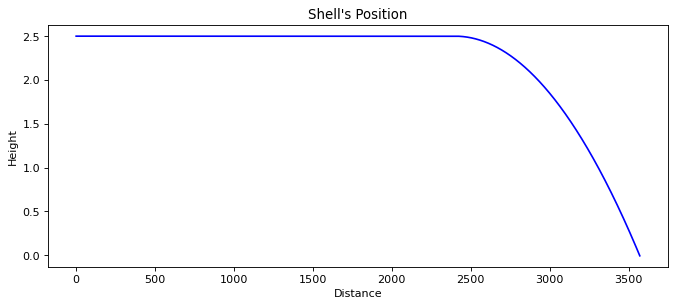

In [4]:
x = xData #X-Value
y = yData #Y-Value
plt.figure(
    figsize=(10,4),
    dpi=80
)
plt.plot(
    x,
    y,
    color='blue',
    markersize=12,
    markeredgecolor='g',
)
plt.title("Shell's Position")
plt.xlabel("Distance")
plt.ylabel("Height")
plt.show()

In [5]:
print(f"The Range of the Shell can fly {format(xData[-1],'.2f')} meters")
print(f"With the time of {format(time,'.2f')} seocnds")

The Range of the Shell can fly 3570.57 meters
With the time of 2.13 seocnds


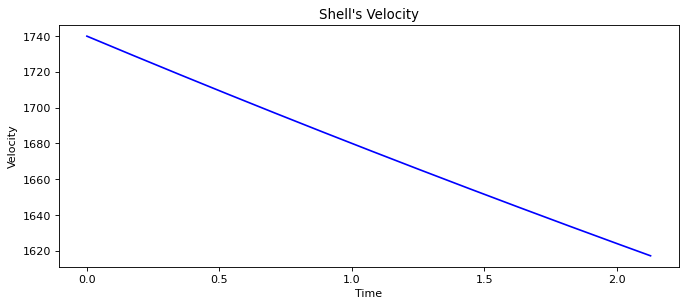

In [9]:
x = np.arange(0,time,0.001)
y = xvel
plt.figure(
    figsize=(10,4),
    dpi=80
)
plt.plot(
    x,
    y,
    color='blue',
    markersize=12,
    markeredgecolor='g',
)
plt.title("Shell's Velocity")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.show()

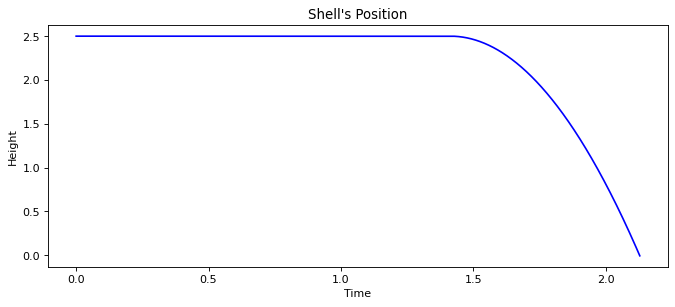

In [7]:
x = np.arange(0,time,0.001)
y = yData
plt.figure(
    figsize=(10,4),
    dpi=80
)
plt.plot(
    x,
    y,
    color='blue',
    markersize=12,
    markeredgecolor='g',
)
plt.title("Shell's Position")
plt.xlabel("Time")
plt.ylabel("Height")
plt.show()

### References
https://fbcinc.com/source/Northrop_Resources/120mm_M829A3.pdf
https://apps.dtic.mil/sti/pdfs/ADA361333.pdf
https://man.fas.org/dod-101/sys/land/m829a1.htm
Z. Huang, Z. Chen: Numerical investigation of the tree-dimensional dynamic process of sabot discard, 
Journal of Mechanical Science and Technology, Vol 28, No 7, 2637-2649, 2014. 
B. Zečević: Anti-tank Ammunition, Lectures for students, University of Sarajevo, Mechanical engineering 
faculty, Defense Technologies Department, Sarajevo, 2018. 